Let’s take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC). This data can be found at births.csv

In [1]:
import pandas as pd

In [18]:
births=pd.read_csv("births.csv")
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [19]:
#To check for null values
births.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [20]:
#To fill the null values of day with 0 and change data type to integer
births['day'].fillna(0,inplace=True)
births['day']=births['day'].astype(int)

In [21]:
#To create a new  calculated variable "decade"
births['decade'] = 10 * (births['year'] // 10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [22]:
#To create pivot table
pvt=births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
pvt.head()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year :

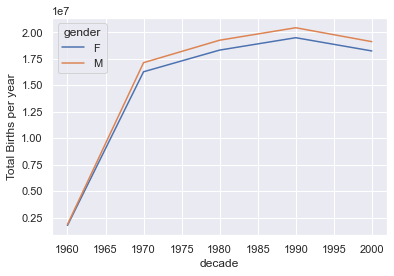

In [23]:
#To plot the pivot table data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pvt.plot()
plt.ylabel("Total Births per year")
plt.show()

Further data exploration:
There are a few interesting features we can pull out of this dataset using the Pandas tools. We must start by cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to cut outliers, we’ll do this via a robust sigma-clipping operation:

In [24]:
import numpy as np

In [25]:
#To find out the quartiles and sigma value
quartiles=np.percentile(births['births'],[25,50,75])
print(quartiles)
mean=quartiles[1]
print(mean)
sigma=0.74*(quartiles[2]-quartiles[0])
print(sigma)

[4358.  4814.  5289.5]
4814.0
689.31


This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:

In [26]:
#To select the birth values within the range (mean-5*sigma and mean+5*sigma)
births = births.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
births

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [28]:
#Create the index
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day,format='%Y%m%d')
births['day of week'] = births.index.dayofweek
births

c:\users\user\anaconda3\envs\ml_practice\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,month,day,gender,births,decade,day of week
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


Using this we can plot births by weekday for several decades:

In [30]:
births_day = births.pivot_table('births', index='day of week',
                                columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day

decade,1960,1970,1980
Mon,5063.826923,4689.097701,5276.907249
Tues,5286.096154,4885.252399,5503.842553
Wed,5074.622642,4750.376200,5367.642553
Thurs,4978.288462,4696.923372,5333.485106
Fri,5107.884615,4782.095785,5393.087234
Sat,4651.057692,4207.784483,4483.901064
Sun,4342.346154,3979.278736,4308.120469


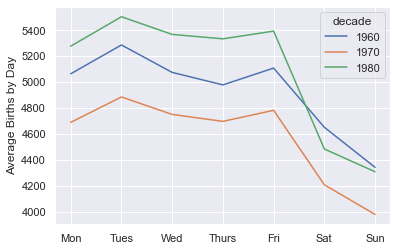

In [31]:
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another interesting view is to plot the mean number of births by the day of the year. Let’s first group the data by month and day separately:

In [34]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2020, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2020-01-01  4009.225
2020-01-02  4247.400
2020-01-03  4500.900
2020-01-04  4571.350
2020-01-05  4603.625


c:\users\user\anaconda3\envs\ml_practice\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. From this, we can use the plot method to plot the data. It reveals some interesting trends:

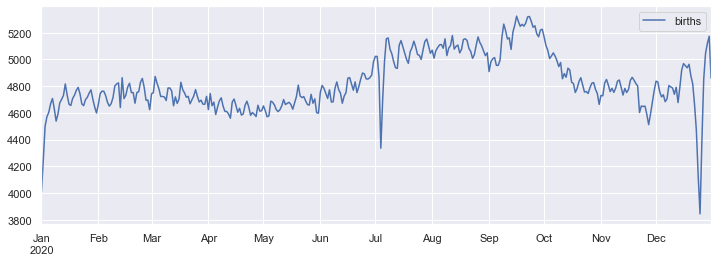

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()